###### Image captioning using the BLIP (Bootstrapping Language-Image Pre-training) model from Hugging Face's transformers

In [33]:
#import paskages 
from transformers import BlipProcessor,BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt


BlipProcessor: Used to preprocess the image so that it can be fed into the model.

BlipForConditionalGeneration: The BLIP model for generating captions.

In [10]:
#Initialize Processor :
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

In [11]:
#Initialize  Model:
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")



C:\Users\DELL\anaconda3\lib\site-packages\transformers\modeling_utils.py:488: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location=m

In [13]:
# Load  image
img_path='images/trump.png'
image=Image.open(img_path).convert("RGB")

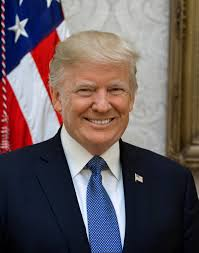

In [14]:
#show image
image

In [15]:
#prepare image 

inputs= processor(image , return_tensors='pt')

In [18]:
# Generate a caption for the image
outputs=model.generate(**inputs)

C:\Users\DELL\anaconda3\lib\site-packages\transformers\generation\utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [21]:
caption=processor.decode(outputs[0] , skip_special_tokens=True)

In [22]:
caption

'president donald trump'

In [38]:
# make it function to caption images 
def img_caption(img_path):
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    
    image=Image.open(img_path).convert("RGB")
    
    text=" the image it :"
    inputs=processor(images=image  , return_tensors='pt')
    outputs=model.generate(**inputs,max_length=50)
    caption=processor.decode(outputs[0],skip_special_tokens=True)
    
    # Display image 
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(caption, fontsize=15)
    plt.show()
    return caption

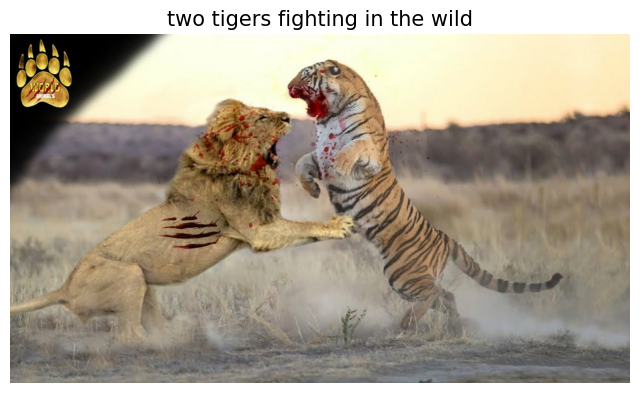

'two tigers fighting in the wild'

In [40]:
img_caption('images/tiger.png')

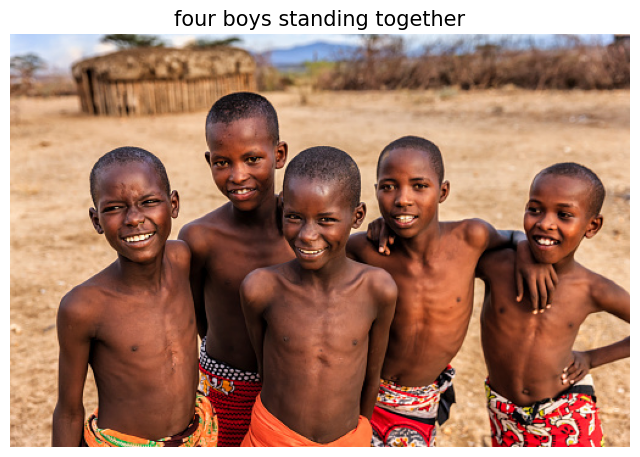

'four boys standing together'

In [39]:
img_caption('images/boys.png')

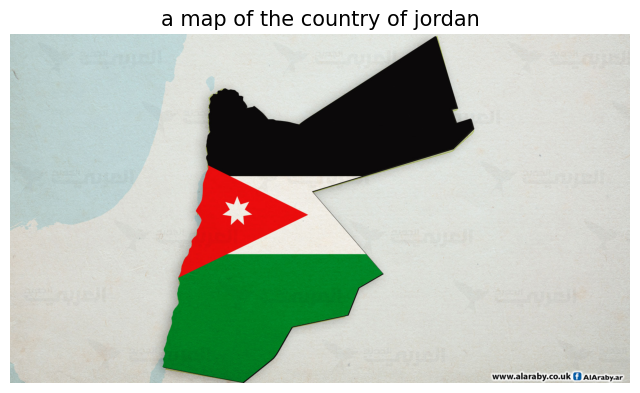

'a map of the country of jordan'

In [42]:
img_caption('images/map_jo.png')